In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

#parameters: 
m = 8       
n = m * m
dx = 20/8

# Initialize vectors
e0 = np.zeros((n, 1))  # Vector of zeros
e1 = np.ones((n, 1))   # Vector of ones
e2 = np.copy(e1)       # Copy of e1 one vector
e4 = np.copy(e0)       # Copy of e0 zero vector

for j in range(1, m + 1):
    e2[m * j - 1] = 0     
    e4[m * j - 1] = 1 

e3 = np.zeros_like(e2)
e3[1:] = e2[:-1]
e3[0] = e2[-1]  # Wrap around for periodic boundary

e5 = np.zeros_like(e4)
e5[1:] = e4[:-1] 
e5[0] = e4[-1]  # Wrap around for periodic boundary

diagonals = [
    e1.flatten(),             # -n + m diagonal
    e1.flatten(),             # -m diagonal
    e5.flatten(),             # -m + 1 diagonal
    e2.flatten(),             # -1 diagonal
    (-4 * e1).flatten(),      # Main diagonal (0)
    e3.flatten(),             # +1 diagonal
    e4.flatten(),             # +m - 1 diagonal
    e1.flatten(),             # +m diagonal
    e1.flatten()              # +n - m diagonal
]
offsets = [-(n - m), -m, -m + 1, -1, 0, 1, m - 1, m, (n - m)]
A = spdiags(diagonals, offsets, n, n).toarray()
A /= dx**2
A1 = A

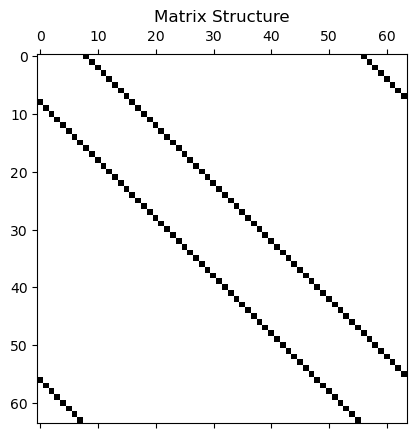

In [20]:
#B: right neighbor - left neighbor 
e1 = np.ones((n, 1)) 
diagonals_B = [e1.flatten(), -e1.flatten(), e1.flatten(),-e1.flatten()]
offsets_B = [-(n - m),-m, m, (n - m)]

B = spdiags(diagonals_B, offsets_B, n, n).toarray()
B /= 2*dx  # Scale by grid spacing dx for the derivative
#central difference 
# 1. define diagonal, set where to put the values
# 2. define where you want to put into the values 
# use spdiags, putting vals to the offset 
# because use the center deifference, B.toarray()
# divide by the dx 
# Plot matrix structure
plt.figure(5)
plt.spy(B)
plt.title('Matrix Structure')
plt.show()
A2 = B 

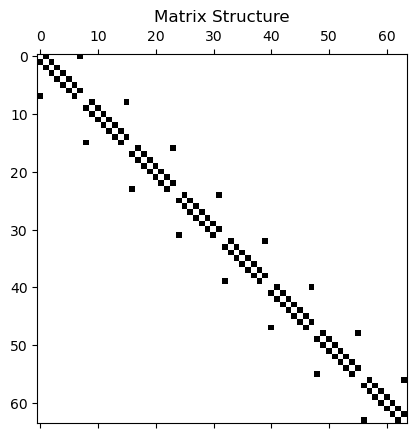

In [29]:
#B: right neighbor - left neighbor 
# Define the vectors with specified patterns
e1 = np.zeros((n, 1))
for i in range(0, n, m):
    e1[i] = 1  # Pattern [1, 0, 0, 0, 0, 0, 0, 0]

e2 = np.ones((n, 1))
for i in range(m - 1, n, m):
    e2[i] = 0  # Pattern [1, 1, 1, 1, 1, 1, 1, 0]

e3 = np.ones((n, 1))
for i in range(0, n, m):
    e3[i] = 0  # Pattern [0, 1, 1, 1, 1, 1, 1, 1]

e4 = np.zeros((n, 1))
for i in range(m - 1, n, m):
    e4[i] = 1  # Pattern [0, 0, 0, 0, 0, 0, 0, 1]
    
diagonals_C = [e1.flatten(), -e2.flatten(), e3.flatten(),-e4.flatten()]
offsets_C = [-m+1,-1,1,m-1]

C = spdiags(diagonals_C, offsets_C, n, n).toarray()
C /= 2*dx  # Scale by grid spacing dx for the derivative
#central difference 
# 1. define diagonal, set where to put the values
# 2. define where you want to put into the values 
# use spdiags, putting vals to the offset 
# because use the center deifference, B.toarray()
# divide by the dx 
# Plot matrix structure
plt.figure(5)
plt.spy(C)
plt.title('Matrix Structure')
plt.show()
A3 = C